In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import os

In [2]:
sns.set()
%matplotlib inline

In [3]:
np.random.seed(42)

In [4]:
hoje = datetime.datetime.today()

In [5]:
path_dados = '..Dados_originais/Dados_site/'

In [6]:
file_propostas = os.path.join(path_dados, 'propostas_pdm_29_4.xlsx')
file_revisoes = os.path.join(path_dados, 'revisoes_pdm_29_4.xlsx')

In [7]:
prop = pd.read_excel(file_propostas)
revi = pd.read_excel(file_revisoes)

In [8]:
prop.head()

,Unnamed: 0,autor,link_proposta,data_submissao,qtd_apoios,temas,conteudo
0,0,Rede Nossa São Paulo,/legislation/processes/116/proposals/454,29/04/2021,1,Assistência Social; Habitação,Entregar 10.200 vagas em serviços de moradia s...
1,1,Rede Nossa São Paulo,/legislation/processes/116/proposals/453,29/04/2021,1,Transportes e mobilidade,Garantir que 2% das viagens na cidade sejam re...
2,2,Rede Nossa São Paulo,/legislation/processes/116/proposals/452,29/04/2021,1,Transportes e mobilidade,Garantir que 6 em cada 10 deslocamentos com ve...
3,3,Rede Nossa São Paulo,/legislation/processes/116/proposals/451,29/04/2021,1,Transportes e mobilidade,Reduzir o tempo de deslocamento em transportes...
4,4,Rede Nossa São Paulo,/legislation/processes/116/proposals/450,29/04/2021,1,Transportes e mobilidade,"Garantir a acessibilidade universal de 3,5 mil..."


In [9]:
revi.head()

,Unnamed: 0,meta_iniciativa,descricao,indicador,categoria,nome_usuario,url_usuario,texto_sugestao
0,0,1.1.1. Meta 1,Meta 1: Atender 1.500.000 pessoas em programas...,Indicador:Número de pessoas atendidas em progr...,Revisar,claudia lucena paschotto,/users/21405,Implantação de programa de alimentação e apoio...
1,1,1.1.1. Meta 1,Meta 1: Atender 1.500.000 pessoas em programas...,Indicador:Número de pessoas atendidas em progr...,Revisar,IvoFOliveira,/users/20353,Alteração no texto. Meta 1: Atender 1.500.000 ...
2,2,1.1.1. Meta 1,Meta 1: Atender 1.500.000 pessoas em programas...,Indicador:Número de pessoas atendidas em progr...,Manter,Fernanda Imperio Lima,/users/19369,Proposta apoiada pela Deliberação Cidadã de S....
3,3,1.1.1. Meta 1,Meta 1: Atender 1.500.000 pessoas em programas...,Indicador:Número de pessoas atendidas em progr...,Revisar,sophia lima rocha,/users/21177,A meta de atendimento de pessoas já esta abaix...
4,4,1.1.1. Meta 1,Meta 1: Atender 1.500.000 pessoas em programas...,Indicador:Número de pessoas atendidas em progr...,Revisar,Vita Aguiar de Oliveira,/users/10239,completar o apoio nutricional engloba nutrição...


In [10]:
print(f'O total de propostas é de {len(prop)} e de revisões é de {len(revi)}')

O total de propostas é de 432 e de revisões é de 338


In [11]:
prop.dtypes

Unnamed: 0         int64
autor             object
link_proposta     object
data_submissao    object
qtd_apoios         int64
temas             object
conteudo          object
dtype: object

In [12]:
prop['count'] = 1

In [13]:
prop['data_submissao'] = pd.to_datetime(prop['data_submissao'], format = '%d/%m/%Y')

In [14]:
props_por_data = prop.sort_values(by='data_submissao').groupby('data_submissao').count()[['count']].copy()

Text(0, 0.5, 'Qtd propostas')

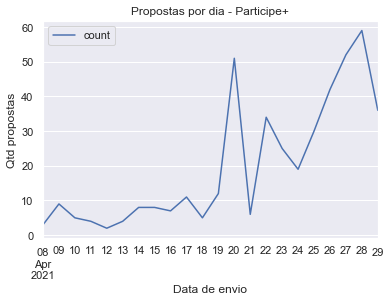

In [15]:
ax = props_por_data.plot(title  = 'Propostas por dia - Participe+')
ax.set_xlabel("Data de envio")
ax.set_ylabel("Qtd propostas")

In [16]:
fig = ax.get_figure()
fig.savefig('grafico_propostas.jpg')

In [17]:
media_prop_dia = round(props_por_data['count'].mean(), 2)

In [18]:
print(f'A media de propostas por dia é de {media_prop_dia}')

A media de propostas por dia é de 19.64


<AxesSubplot:title={'center':'Histograma - Propostas por dia'}, ylabel='Frequency'>

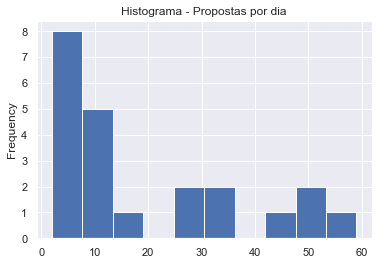

In [19]:
props_por_data['count'].plot.hist(bins = 10, title = 'Histograma - Propostas por dia')

In [20]:
props_por_data.mode()

,count
0,4
1,5
2,8


In [21]:
props_por_data['cumulativo'] = props_por_data['count'].cumsum()

Text(0, 0.5, 'Qtd propostas acumuladas')

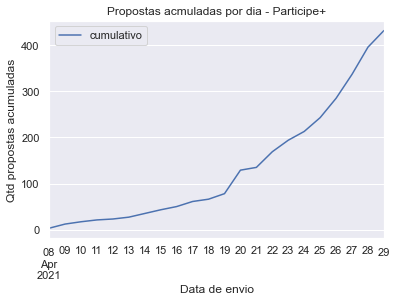

In [22]:
ax = props_por_data[['cumulativo']].plot(title  = 'Propostas acmuladas por dia - Participe+')
ax.set_xlabel("Data de envio")
ax.set_ylabel("Qtd propostas acumuladas")

In [23]:
fig = ax.get_figure()
fig.savefig('grafico_propostas_cumulativo.jpg')

In [24]:
props_por_data['qtd_dias'] = [i for i in range(len(props_por_data))]

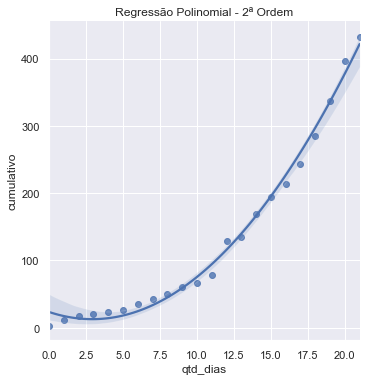

In [25]:
ax = sns.lmplot(x = 'qtd_dias', y = 'cumulativo', data = props_por_data, order = 2)
ax.set(title = 'Regressão Polinomial - 2ª Ordem')

In [26]:
ax.savefig('regrassao_polinomial.png')

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
df = props_por_data.reset_index().copy()

In [29]:
X = props_por_data['qtd_dias'].values.reshape(-1, 1)
y = props_por_data['cumulativo'].values.reshape(-1, 1)


In [30]:
degree=2

In [31]:
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [32]:
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [33]:
y_pred = polyreg.predict(X)

In [34]:
mean_squared_error(y_pred, y)

116.56647502694928

In [35]:
mean_absolute_error(y_pred, y)

9.207509881422933

In [36]:
scores = cross_val_score(polyreg, X, y, cv=5, scoring = 'neg_mean_absolute_error')

In [37]:
-scores.mean()

20.746858538310953

In [38]:
prox_dez_dias = np.linspace(20, 32)
prev_prox_dez_dias  = polyreg.predict(np.linspace(20, 30).reshape(-1, 1))

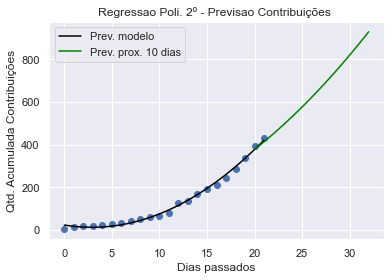

In [39]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.scatter(props_por_data['qtd_dias'].values,props_por_data['cumulativo'].values)
plt.plot(X,polyreg.predict(X),color="black")
ax = plt.plot(prox_dez_dias,prev_prox_dez_dias,color="green")
plt.title(f"Regressao Poli. {degree}º - Previsao Contribuições ")
plt.ylabel('Qtd. Acumulada Contribuições')
plt.xlabel('Dias passados')
plt.legend(['Prev. modelo', 'Prev. prox. 10 dias'])
plt.show()

In [40]:
fig.savefig('previsao_contribuicoes_participe+.png', facecolor = 'w')

In [41]:
df

,data_submissao,count,cumulativo,qtd_dias
0,2021-04-08,3,3,0
1,2021-04-09,9,12,1
2,2021-04-10,5,17,2
3,2021-04-11,4,21,3
4,2021-04-12,2,23,4
5,2021-04-13,4,27,5
6,2021-04-14,8,35,6
7,2021-04-15,8,43,7
8,2021-04-16,7,50,8
9,2021-04-17,11,61,9


In [42]:
polyreg.predict([[32]])

array([[1069.93478261]])